# Context 

The aim is to create a chatbot that could provide knowledge and guidance to the users of TAMBR's solution. In order to provide domain-specific knowledge, the bot should be trained with data that lays within the context. In this scenario: sonic branding. 

# Introduction 

The project below aims at showcasing how an OpenAI conversational agent (chatbot) can be trained on self-gathered data and use it as a question and a prompt for the to formulate a response. The technology shows how TAMBR could use the massive amount of information that the ChatGPT-model posseses and also counter it's weakness: being limited. The model doesn't have specific knowledge, like something about the goals of TAMBR as a company. This could be resolved by 'feeding' the bot with own data, for example from an interview with the co-founder of the company. Both the questions and the anwsers could be used to expand the knowledge of the chatbot. This could contribute to the chatbot being available to absorb any type of knowledge. 

### Topics: 

- OpenAI
- Cosine similarity 
- Vector embedding
- Data gathering from a YouTube video
- AI text transcribtions
- Data cleaning & processing
- Working with dataframes
- Functions 
- File writing & reading
- Providing a personalized prompt & questions for the ChatGPT 3.5 model

# Install the required tools



In [3]:
!pip install openai
!pip install openai pytube -q
!pip install whisper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for whisper: filename=whisper-1.1.10-py3-none-any.whl size=41121 sha256=8b8b86f20f0cfac842c28fe6399d20e3f4c4d87b3052a3b235966deb923a2ff7
  Stored in directory: /Users/bartoszszachulski/Library/Caches/pip/wheels/21/65/ee/4e6672aabfa486d3341a39a04f8f87c77e5156149299b5a7d0
Successfully built whisper


# FFmpeg

_"FFmpeg is a leading multimedia framework with the capability to decode, encode, transcode, mux, demux, stream, filter, and play a wide range of multimedia formats. It handles everything from the most obscure ancient formats to cutting-edge standards, whether designed by standards committees, communities, or corporations. FFmpeg is highly portable, seamlessly running on Linux, Mac OS X, Microsoft Windows, the BSDs, Solaris, and more. It compiles, runs, and undergoes testing infrastructure FATE across various build environments, machine architectures, and configurations._" (About FFmpeg, n.d.)

#### Importance
This tool proved to be during the transcription of audio from .mp4 files.

During the building process, an error __FileNotFoundError: [WinError 2] The system cannot find the file specified__ was encountered. Despite the specified file (.mp4 with audio) being correctly formatted, spelled accurately, and located in the root folder, the error persisted. Installing FFmpeg resolved the issue.

#### Download
For installation instructions and access to the software, refer to the following link: https://www.geeksforgeeks.org/how-to-install-ffmpeg-on-windows/

# Code

The following section tries to describe the functionality of pieces of code used for this project.

In [1]:
import openai
import whisper
import pandas as pd
from pytube import YouTube
from getpass import getpass

COMPLETIONS_MODEL = "gpt-3.5-turbo-instruct"
EMBEDDINGS_MODEL = "text-embedding-ada-002"

openai.api_key = getpass()

In [ ]:
pip install git+https://github.com/openai/whisper.git

In [2]:
model = whisper.load_model('base')

In [4]:
youtube_video_url = "https://www.youtube.com/watch?v=2KgEQQlGrPg"
youtube_video = YouTube(youtube_video_url)

In [5]:
stream = youtube_video.streams.filter(only_audio=True).first()
stream.download(filename="What_is_sonic_branding.mp4")

'/Users/bartoszszachulski/Library/CloudStorage/OneDrive-StichtingHogeschoolUtrecht/Data Science/Block B/Block B/ML_project/What_is_sonic_branding.mp4'

In [6]:
youtube_video.description

"What is sonic branding? Why it is crucial for your brand and how to get started. This video explains what sonic branding is, gives examples of how it has been used effectively and how you can get started with sonic branding. With more and more businesses producing videos, podcasts and video ads the rise in sonic branding has been increasing so it is important now more than ever to get your audio brand handled.  \n\nHow to build a memorable brand course - BRAND BUILDING COURSE - http://bit.ly/2Zw5dos\n\nIf you need help with a your sonic branding or any part of your brand you can schedule a call here - https://www.elementsbrandmanagement.co.uk/schedule-a-call\n\nIn order to make sure your rebrand is a success you first need to have a good understanding of your brand,  what it stands for, why it exists and the things that make you unique. If you need help defining this you can download our FREE Workbook that will help you go through this process.\n\nHow to define your brand - Worksheet 

In [9]:
output = model.transcribe("What_is_sonic_branding.mp4")

/Users/bartoszszachulski/anaconda3/lib/python3.11/site-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


FileNotFoundError: [Errno 2] No such file or directory: 'ffmpeg'

In [8]:
output

NameError: name 'output' is not defined

In [11]:
output['text']

" Do you create videos or podcasts as part of your business marketing? Are you advertising on YouTube, streaming platforms or television? Then you're probably already creating an audio brand. In this video, I'm going to describe what Sonic Branding is and why it's important for your business. Welcome to Weekly Brand Tips. Brought to you by Elements Brand Management. Weekly videos designed to help you unlock your brand's potential so you can stand out from the competition and create impacts. Please remember to subscribe, use the button below this video and if you hit the bell notification, you'll be notified every time a new video drops. Building an audio element to your brand is often an afterthought for most businesses and in some cases it's something that people don't even think of at all. But if you use music or sound effects or any kind of audio, that could be your voice or the timber of your voice or the way that you use sounds to help elevate videos or anything that you do, then 

In [33]:
import csv
import pandas as pd

# create a new pandas dataframe
df = pd.DataFrame(columns=['name', 'start_timestamp', 'start', 'end', 'topics', 'context'])

# index to keep track of current row
i = 0

with open('Questions_interview_raw.csv') as csv_file:
    reader = csv.reader(csv_file)

    # ignore the header row in the file
    next(reader)

    for row in reader:
        # assign each column in the row to a variable and split questions on carriage return
        name, topics = row
        question_list = topics.split("\n")

        # for each question in the list, extract the timestamp and convert it to seconds for youtube
        for question in question_list:
            pieces = question.split('-')
            timestamp = pieces[0]
            minutes, seconds = timestamp.split(':')
            seconds = int(seconds) + (int(minutes) * 60)

            # add a new row to the dataframe
            df.loc[i] = [name, timestamp, seconds, 0, " ".join(pieces[1:]), ""]

            # set the 'end' value for the previous row
            if i > 0:
                df.loc[i - 1, 'end'] = seconds

            i += 1

# set the 'end' value for the last row
if i > 0:
    df.loc[i - 1, 'end'] = seconds

df.to_csv("questions.csv")


In [34]:
import pandas as pd

df = pd.read_csv('questions.csv')
df

,Unnamed: 0,name,start_timestamp,start,end,topics,context
0,0,Sonic branding interview,00:00,0,82,Introduction,NaN
1,1,Sonic branding interview,01:22,82,269,What is Sonic Branding?,NaN
2,2,Sonic branding interview,04:29,269,335,How does it fit into your wider brand?,NaN
3,3,Sonic branding interview,05:35,335,467,Examples of Sonic Branding,NaN
4,4,Sonic branding interview,07:47,467,578,Where can you start with Sonic Branding?,NaN
5,5,Sonic branding interview,09:38,578,578,Promotion by the interviewee,NaN


In [69]:
def is_part_of_question(segment, start, end):
    if segment['start'] > start:
      if segment['end'] < end or end == 0:
          return True 

    return False

def get_question_context(row):
     global output

     question_segments = list(filter(lambda segment: is_part_of_question(segment, row['start'], row['end']), output['segments']))
     # include question from timestamp in the context
     context = row['topics']
     for segment in question_segments:
         context += segment['text']

     return context

df['context'] = df.apply(get_question_context, axis=1)

df


,Unnamed: 0,name,start_timestamp,start,end,topics,context,embedding,similarities
0,0,Sonic branding interview,00:00,0,82,Introduction,Introduction streaming platforms or televisio...,"[0.005746083799749613, -0.010243019089102745, ...",0.761444
1,1,Sonic branding interview,01:22,82,269,What is Sonic Branding?,What is Sonic Branding? So what is Sonic Bran...,"[0.014343622140586376, 0.005023498088121414, 0...",0.752956


In [55]:
from openai.embeddings_utils import get_embedding


df['embedding'] = df['context'].apply(lambda row: get_embedding(row, engine='text-embedding-ada-002'))
df.to_csv('questions_embeddings.csv')

In [64]:
from openai.embeddings_utils import cosine_similarity

question = "What is music?"
question_vector = get_embedding(question, engine='text-embedding-ada-002')

df["similarities"] = df['embedding'].apply(lambda x: cosine_similarity(x, question_vector))
df = df.sort_values("similarities", ascending=False).head(2)

df

,Unnamed: 0,name,start_timestamp,start,end,topics,context,embedding,similarities
0,0,Sonic branding interview,00:00,0,82,Introduction,Introduction streaming platforms or televisio...,"[0.005746083799749613, -0.010243019089102745, ...",0.761444
1,1,Sonic branding interview,01:22,82,269,What is Sonic Branding?,What is Sonic Branding? So what is Sonic Bran...,"[0.014343622140586376, 0.005023498088121414, 0...",0.752956


In [65]:
context = []
for i, row in df.iterrows():
  context.append(row['context'])

context

[" Introduction streaming platforms or television? Then you're probably already creating an audio brand. In this video, I'm going to describe what Sonic Branding is and why it's important for your business. Welcome to Weekly Brand Tips. Brought to you by Elements Brand Management. Weekly videos designed to help you unlock your brand's potential so you can stand out from the competition and create impacts. Please remember to subscribe, use the button below this video and if you hit the bell notification, you'll be notified every time a new video drops. Building an audio element to your brand is often an afterthought for most businesses and in some cases it's something that people don't even think of at all. But if you use music or sound effects or any kind of audio, that could be your voice or the timber of your voice or the way that you use sounds to help elevate videos or anything that you do, then you're already starting to build out an audio element to your brand, whether you realiz

In [66]:
text = "\n".join(context)
text

" Introduction streaming platforms or television? Then you're probably already creating an audio brand. In this video, I'm going to describe what Sonic Branding is and why it's important for your business. Welcome to Weekly Brand Tips. Brought to you by Elements Brand Management. Weekly videos designed to help you unlock your brand's potential so you can stand out from the competition and create impacts. Please remember to subscribe, use the button below this video and if you hit the bell notification, you'll be notified every time a new video drops. Building an audio element to your brand is often an afterthought for most businesses and in some cases it's something that people don't even think of at all. But if you use music or sound effects or any kind of audio, that could be your voice or the timber of your voice or the way that you use sounds to help elevate videos or anything that you do, then you're already starting to build out an audio element to your brand, whether you realize

In [67]:
context = text

context

" Introduction streaming platforms or television? Then you're probably already creating an audio brand. In this video, I'm going to describe what Sonic Branding is and why it's important for your business. Welcome to Weekly Brand Tips. Brought to you by Elements Brand Management. Weekly videos designed to help you unlock your brand's potential so you can stand out from the competition and create impacts. Please remember to subscribe, use the button below this video and if you hit the bell notification, you'll be notified every time a new video drops. Building an audio element to your brand is often an afterthought for most businesses and in some cases it's something that people don't even think of at all. But if you use music or sound effects or any kind of audio, that could be your voice or the timber of your voice or the way that you use sounds to help elevate videos or anything that you do, then you're already starting to build out an audio element to your brand, whether you realize

In [68]:
prompt = f"""Answer the following question using only the context below. 

Context:
{context}

Q: {question}
A:"""

openai.Completion.create(
    prompt=prompt,
    temperature=1,
    max_tokens=500,
    top_p=1,
    frequency_penalty=0,
    presence_penalty=0,
    model="gpt-3.5-turbo-instruct"
)["choices"][0]["text"].strip(" \n")

'Music is an element of branding that businesses can use to create a sound or sonic identity to connect with their audience and elicit emotions or associations. It is typically used in videos, podcasts, and other media to enhance the overall brand experience.'

Unfortunately, due to time constraints, I didn't manage to document the whole process. The code does work, however. The output of the last piece of code is:

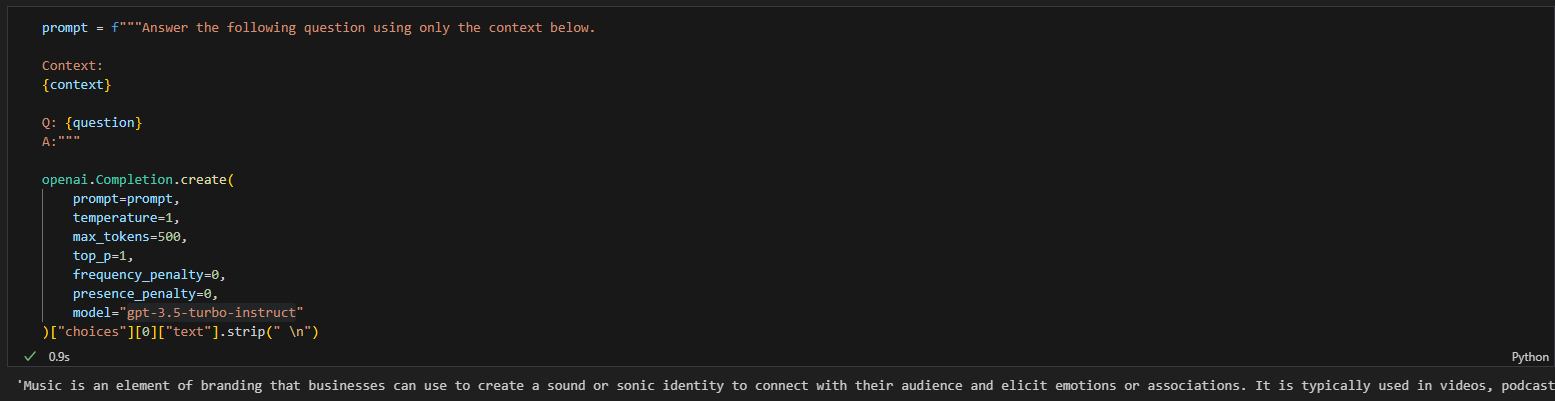

The question asked to the ChatGPT model was: "What is music?" You can see that the anwser seems all right.

# References

Msv, J. (2023, 4 augustus). Tutorial: Use Chroma and OpenAI to build a custom Q&A bot. The New Stack. https://thenewstack.io/tutorial-use-chroma-and-openai-to-build-a-custom-qa-bot/

Google Colaboratory. (z.d.). https://colab.research.google.com/drive/1tttDqgnWL9yJtmlOFXJqA-BjQ1Pyfpax?usp=sharing#scrollTo=VsqkYbCD05TC

Stack Overflow - where developers learn, share, & build careers. (z.d.). Stack Overflow. https://stackoverflow.com/

OpenAI Developer Forum. (z.d.). OpenAI Developer Forum. https://community.openai.com/

Python Tutorial. (2022, 3 december). Python Tutorial. Python Tutorial - Master Python Programming For Beginners from Scratch. https://www.pythontutorial.net/

How to use Audacity - Audacity Manual. (z.d.). https://manual.audacityteam.org/man/how_to_use_audacity.html

Audacity Manual. (z.d.). https://manual.audacityteam.org/index.html

https://www.geeksforgeeks.org/how-to-install-ffmpeg-on-windows/

About FFMPEG. (z.d.). https://ffmpeg.org/about.html